# Reinforcement Learning and Classification

This assignment is about **sequential decision making** under uncertainty (reinforcement learning).


* To make things concrete, we will first focus on decision making under **no** uncertainity (questions 1 and 2), i.e, given we have a world model, we can calculate the exact and optimal actions to take in it. We will first introduce **Markov Decision Process (MDP)** as the world model. Then we give one algorithm (out of many) to solve it.

* (optional) Next we will work through one type of reinforcement learning algorithm called Q-learning (question 3). Q-learning is an algorithm for making decisions under uncertainity, where uncertainity is over the possible world model (here MDP). It will find the optimal policy for the **unknown** MDP, assuming we do infinite exploration.

* Finally, in question 4 you will be asked to explain differences between reinforcement learning and supervised learning and in question 5 write about decision trees and random forests.

## Primer
### Decision Making
The problem of **decision making under uncertainty** (commonly known as **reinforcement learning**) can be broken down into
two parts. First, how do we learn about the world? This involves both the
problem of modeling our initial uncertainty about the world, and that of drawing conclusions from evidence and our initial belief. Secondly, given what we
currently know about the world, how should we decide what to do, taking into
account future events and observations that may change our conclusions?
Typically, this will involve creating long-term plans covering possible future
eventualities. That is, when planning under uncertainty, we also need to take
into account what possible future knowledge could be generated when implementing our plans. Intuitively, executing plans which involve trying out new
things should give more information, but it is hard to tell whether this information will be beneficial. The choice between doing something which is already
known to produce good results and experiment with something new is known
as the **exploration-exploitation dilemma**.

### The exploration-exploitation trade-off

Consider the problem of selecting a restaurant to go to during a vacation. Lets say the
best restaurant you have found so far was **Les Epinards**. The food there is
usually to your taste and satisfactory. However, a well-known recommendations
website suggests that **King’s Arm** is really good! It is tempting to try it out. But
there is a risk involved. It may turn out to be much worse than **Les Epinards**,
in which case you will regret going there. On the other hand, it could also be
much better. What should you do?
It all depends on how much information you have about either restaurant,
and how many more days you’ll stay in town. If this is your last day, then it’s
probably a better idea to go to **Les Epinards**, unless you are expecting **King’s
Arm** to be significantly better. However, if you are going to stay there longer,
trying out **King’s Arm** is a good bet. If you are lucky, you will be getting much
better food for the remaining time, while otherwise you will have missed only
one good meal out of many, making the potential risk quite small.

### Markov Decision Processes
Markov Decision Processes (MDPs) provide a mathematical framework for modeling sequential decision making under uncertainty. An *agent* moves between *states* in a *state space* choosing *actions* that affects the transition probabilities between states, and the subsequent *rewards* recieved after a jump. This is then repeated a finite or infinite number of epochs. The objective, or the *solution* of the MDP, is to optimize the accumulated rewards of the process.

Thus, an MDP consists of five parts:

* Decision epochs: $t={1,2,...,T}$, where $T\leq \infty$
* State space: $S=\{s_1,s_2,...,s_N\}$ of the underlying environment
* Action space $A=\{a_1,a_2,...,a_K\}$ available to the decision maker at each decision epoch
* Transition probabilities $p(s_{t+1}|s_t,a_t)$ for jumping from state $s_t$ to state $s_{t+1}$ after taking action $a_t$
* Reward functions $R_t = r(a_t,s_t,s_{t+1})$ resulting from the chosen action and subsequent transition

A *decision policy* is a function $\pi: s \rightarrow a$, that gives instructions on what action to choose in each state. A policy can either be *deterministic*, meaning that the action is given for each state, or *randomized* meaning that there is a probability distribution over the set of possible actions for each state. Given a specific policy $\pi$ we can then compute the the *expected total reward* when starting in a given state $s_1 \in S$, which is also known as the *value* for that state,

$$V^\pi (s_1) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} s_1\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$

where $a_t = \pi(s_t)$. To ensure convergence and to control how much credit to give to future rewards, it is common to introduce a *discount factor* $\gamma \in [0,1]$. For instance, if we think all future rewards should count equally, we would use $\gamma = 1$, while if we value near-future rewards higher than more distant rewards, we would use $\gamma < 1$. The expected total *discounted* reward then becomes

$$V^\pi( s_1) = \sum_{t=1}^T \gamma^{t-1} r(s_t,a_t, s_{t+1}) p(s_{t+1} | s_t, a_t) $$

Now, to find the *optimal* policy we want to find the policy $\pi^*$ that gives the highest total reward $V^*(s)$ for all $s\in S$. That is, we want to find the policy where

$$V^*(s) \geq V^\pi(s), s\in S$$

To solve this we use a dynamic programming equation called the *Bellman equation*, given by

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

It can be shown that if $\pi$ is a policy such that $V^\pi$ fulfills the Bellman equation, then $\pi$ is an optimal policy.

A real world example would be an inventory control system. The states could be the amount of items we have in stock, and the actions would be the amount of items to order at the end of each month. The discrete time would be each month and the reward would be the profit.


## Question 1

The first question covers a deterministic MPD, where the action is directly given by the state, described as follows:

* The agent starts in state **S** (see table below)
* The actions possible are **N** (north), **S** (south), **E** (east), and **W** west.
* The transition probabilities in each box are deterministic (for example P(s'|s,N)=1 if s' north of s). Note, however, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **F**, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box.
* Assume no discount in this model: $\gamma = 1$
    
    
| | | |
|----------|----------|---------|
|-1 |1|**F**|
|0|-1|1|  
|-1 |0|-1|  
|**S**|-1|1|

Let $(x,y)$ denote the position in the grid, such that $S=(0,0)$ and $F=(2,3)$.

**1a)** What is the optimal path of the MDP above? Is it unique? Submit the path as a single string of directions. For instance, NESW will make a circle.

**1b)** What is the optimal policy (i.e., the optimal action in each state)? It is helpful if you draw the arrows/letters in the grid.

**1c)** What is expected total reward for the policy in 1a)?


#Answers to Question 1
**1a)**

The optimal path is "E E N N N" and it is unique.

**1b)**
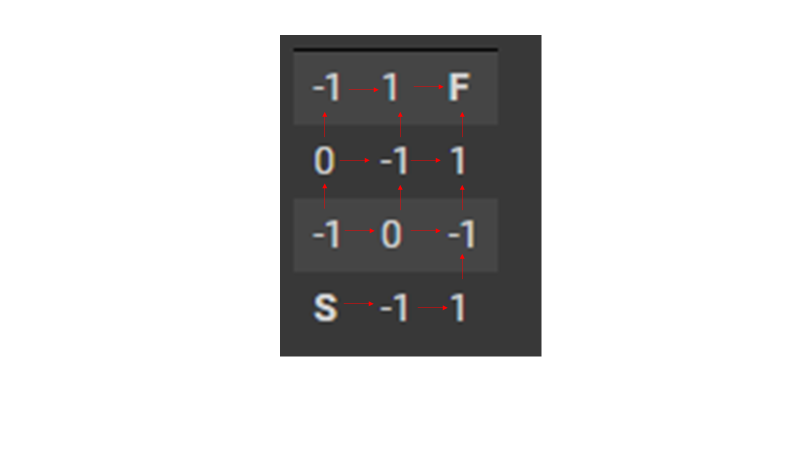

**1c)**

The reward for the policy is 0.

##Un-necessary algorithm for Q1

In [ ]:
#Beginning of coding an algorithm for question 1. Later realised no code was "needed" for answering the quesitons.

import random

data = {
    (0, 0): "S",
    (0, 1): -1,
    (0, 2): 0,
    (0, 3): -1,
    (1, 0): -1,
    (1, 1): 0,
    (1, 2): -1,
    (1, 3): 1,
    (2, 0): 1,
    (2, 1): -1,
    (2, 2): 1,
    (2, 3): "F"
}

def validDirections(x, y):
    res = []
    if x > 0:
        res.append('W')
    if x < 2:
        res.append('E')
    if y > 0:
        res.append('S')
    if y < 3:
        res.append('N')
    return res

def move(agent, dir):
  if dir == 'N':
    agent.y += 1
  if dir == 'S':
    agent.y -= 1
  if dir == 'E':
    agent.x += 1
  if dir == 'W':
    agent.x -= 1


class Agent:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.points = 0

agent = Agent(0, 0)

while agent.x != 2 & agent.y !=3:
  dir = validDirections(agent.x, agent.y)
  movedir = random.choice(dir)
  move(agent, movedir)
  if agent.x == 2 and agent.y == 3:
    print(f' WON {agent.points}')
    break
  if agent.x == 0 and agent.y == 0:
    print('back to start')
    break
  else:
    agent.points += data[agent.x, agent.y]

print(agent.x, agent.y, agent.points)




0 0 0


## Value Iteration

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V^*$ in the right-hand side (RHS) of the Bellman equation should result in the same $V^*$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what actions that satisfy the equation.    

The process of repeated application of the Bellman equation is what we here call the _value iteration_ algorithm. It practically procedes as follows:

```
epsilon is a small value, threshold
for x from i to infinity
do
    for each state s
    do
        V_k[s] = max_a Σ_s' p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
    end
    if  |V_k[s]-V_k-1[s]| < epsilon for all s
        for each state s,
        do
            π(s)=argmax_a ∑_s′ p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
            return π, V_k
        end
end

```

**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards given in each state. Assume now that given a certain state $s$ and action $a$, there is a probability 0.8 that that action will be performed and a probability 0.2 that no action is taken. For instance, if we take action **E** in state $(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state), and remain still 20 percent of the time. We will use have a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$.

**Reward**:

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes the $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0$ was zero for all $s'$. The updated values for each state become

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2

**2a)** Code the value iteration algorithm just described here, and show the converging optimal value function and the optimal policy for the above 3x3 grid.

**2b)** Explain why the result of 2a) does not depend on the initial value $V_0$.

**2c)** Describe your interpretation of the discount factor $\gamma$. What would happen in the two extreme cases $\gamma = 0$ and $\gamma = 1$? Given some MDP, what would be important things to consider when deciding on which value of $\gamma$ to use?

In [ ]:
import numpy as np

reward = {
    (0, 0): 0,
    (0, 1): 0,
    (0, 2): 0,
    (1, 0): 0,
    (1, 1): 10,
    (1, 2): 0,
    (2, 0): 0,
    (2, 1): 0,
    (2, 2): 0
}

expected = {
    (0, 0): 0,
    (0, 1): 0,
    (0, 2): 0,
    (1, 0): 0,
    (1, 1): 0,
    (1, 2): 0,
    (2, 0): 0,
    (2, 1): 0,
    (2, 2): 0
}


def pointsNextState(pos):
  res = 0
  bestPos = (0,0)
  for i in range(2):
    for j in [-1, 1]:
      if((pos[0] + j, pos[1]) in reward):
        if(reward[pos[0] + j, pos[1]] >= res):
          res = reward[pos[0] + j, pos[1]]
          bestPos = (pos[0] + j, pos[1])
      if((pos[0], pos[1] + j) in reward):
        if(reward[pos[0], pos[1] + j] >= res):
          res = reward[pos[0], pos[1] + j]
          bestPos = (pos[0], pos[1] + j)

  return {'point' : res,
          'bestPos' : bestPos
         }




lam = 0.9
prob_a = 0.8
prob_noa = 0.2
eps = 0.005

for i in range(100):
  tempexp = {}

  for j in reward:
    next = pointsNextState(j)
    nextPos = next['bestPos']
    rewardNext = reward[nextPos]
    expectedNext =  expected[nextPos]
    rewardHere = reward[j]
    expectedHere = expected[j]

    res = prob_a * (rewardNext + lam * expectedNext) + prob_noa * (rewardHere + lam * expectedHere)

    tempexp[j] = round(res, 2)

  all_smallerthan_eps = all(tempexp[k] - expected[k] < eps for k in expected)

  if all_smallerthan_eps:
    for k in reward:
      optimalpol = pointsNextState(k)
      optimal = optimalpol['bestPos']
      print(f'Optimal policy for {k} is {optimal}')
    break
  else:
    expected = tempexp



print(f'Iteration {i}')
for i in range(3):
  for j in range(3):
      print(f"{expected.get((i, j), 0):<4}", end=" ")
  print()
print()

Optimal policy for (0, 0) is (0, 1)
Optimal policy for (0, 1) is (1, 1)
Optimal policy for (0, 2) is (1, 2)
Optimal policy for (1, 0) is (1, 1)
Optimal policy for (1, 1) is (1, 2)
Optimal policy for (1, 2) is (1, 1)
Optimal policy for (2, 0) is (2, 1)
Optimal policy for (2, 1) is (1, 1)
Optimal policy for (2, 2) is (2, 1)
Iteration 74
45.6 51.94 45.6 
51.94 48.04 51.94 
45.6 51.94 45.6 



#Answers to Question 2

**2b)**

The value algorithm doesnt depend on V0, it will converge to an optimum no matter the V0. Our policies along the way to the optimum will differ but the end result will be the same. Since we continously update our V matrix, for each iteration it will converge closer to the optimum and for example if we have choosen a very high value for one point in V0, each iteration will decrease it until it has converged to the optimum.

**2c)**

If choose a discount factor of 1, the algorithm would continue endlessly since we value all future expected values equal to actual reward. If we choose a discount factor of 0 we would only do one iteration of the algorithm since we only value actual reward and dont care for the future potential expected value. Its the same as discounting cash flow in finance. We value the money now more than the potential money in the future because of inflation and interests etc.

## Reinforcement Learning (RL) (Theory for optional question 3)
Until now, we understood that knowing the MDP, specifically $p(s'|a,s)$ and $r(s,a,s')$ allows us to efficiently find the optimal policy using the value iteration algorithm. Reinforcement learning (RL) or decision making under uncertainity, however, arises from the question of making optimal decisions without knowing the true world model (the MDP in this case).

So far we have defined the value function for a policy through $V^\pi$. Let's now define the *action-value function*

$$Q^\pi(s,a) = \sum_{s'} p(s'|a,s) [r(s,a,s') + \gamma V^\pi(s')]$$

The value function and the action-value function are directly related through

$$V^\pi (s) = \max_a Q^\pi (s,a)$$

i.e, the value of taking action $a$ in state $s$ and then following the policy $\pi$ onwards. Similarly to the value function, the optimal $Q$-value equation is:

$$Q^*(s,a) = \sum_{s'} p(s'|a,s) [r(s,a,s') + \gamma V^*(s')]$$

and the relationship between $Q^*(s,a)$ and $V^*(s)$ is simply

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$

#### Q-learning

Q-learning is a RL-method where the agent learns about its unknown environment (i.e., the MDP is unknown) through exploration. In each time step *t* the agent chooses an action *a* based on the current state *s*, observes the reward *r* and the next state *s'*, and repeats the process in the new state. Q-learning is then a method that allows the agent to act optimally. Here we will focus on the simplest form of Q-learning algorithms, which can be applied when all states are known to the agent, and the state and action spaces are reasonably small. This simple algorithm uses a table of Q-values for each $(s,a)$ pair, which is then updated in each time step using the update rule in step $k+1$

$$Q_{k+1}(s,a) = Q_k(s,a) + \alpha \left( r(s,a) + \gamma \max \{Q_k(s',a')\} - Q_k(s,a) \right) $$

where $\gamma$ is the discount factor as before, and $\alpha$ is a pre-set learning rate. It can be shown that this algorithm converges to the optimal policy of the underlying MDP for certain values of $\alpha$ as long as there  is sufficient exploration. For our case, we set a constant $\alpha=0.1$.

#### OpenAI Gym

We shall use already available simulators for different environments (worlds) using the popular [OpenAI Gym library](https://www.gymlibrary.dev/). It just implements different types of simulators including ATARI games. Although here we will only focus on simple ones, such as the **Chain enviroment** illustrated below.
![alt text](https://chalmersuniversity.box.com/shared/static/6tthbzhpofq9gzlowhr3w8if0xvyxb2b.jpg)
The figure corresponds to an MDP with 5 states $S = \{1,2,3,4,5\}$ and two possible actions $A=\{a,b\}$ in each state. The arrows indicate the resulting transitions for each state-action pair, and the numbers correspond to the rewards for each transition.

## Question 3 (optional)
You are to first familiarize with the framework of [the OpenAI environments](https://www.gymlibrary.dev/), and then implement the Q-learning algorithm for the <code>NChain-v0</code> enviroment depicted above, using default parameters and a learning rate of $\gamma=0.95$. Report the final $Q^*$ table after convergence of the algorithm. For an example on how to do this, you can refer to the Q-learning of the **Frozen lake environment** (<code>q_learning_frozen_lake.ipynb</code>), uploaded on Canvas. *Hint*: start with a small learning rate.

Note that the NChain environment is not available among the standard environments, you need to load the <code>gym_toytext</code> package, in addition to the standard gym:

<code>
!pip install gym-legacy-toytext<br>
import gym<br>
import gym_toytext<br>
env = gym.make("NChain-v0")<br>
</code>

## Question 4

**4a)** What is the importance of exploration in reinforcement learning? Explain with an example.

**4b)** Explain what makes reinforcement learning different from supervised learning tasks such as regression or classification.


## Answers to Question 4

**4a)**
One could say that exploration is essential to not get stuck in local optimas when there is better global optimas. Thus, it is always a balancing act between exploitation and exploration since you in most cases don't know if there is a better state to be found. This can be showcased in many different situations like:
- Following the same study-technique because you know it works to pass the exam. Though there might be a better way to study which will generate a higher grade with the same effort. But you might not want to try in case it will not be a better technique for you and you'll fail the exam.
- Cooking the same dish every day of the week since you now that it is tasty. Followingly, there might be a new receipe worth trying which can be even more tastier, but you're not sure if you'll manage to cook it properly, hence there is also a risk of it being tasteless.

In more real-world issues you can emphasize some of the concepts touched upon in the lectures with more strategy-based issues:
- **Exploiting all the time and never trying new moves, thus many actions and states remain unknown**:

  Can be emphazised by imagining navigating a maze. If you find a way through, though a long and tough one, you might stick to it even though you know there is probably a shortcut, but the risk of getting stuck is scary enough to not try.
-**Exploration is critical to find the optimal solution**:

  Imagine trying to solve the Rubik's cube. You can get almost all the way, but in the last few steps you have to do exploration and mess up previous work to be able to solve it.
-**Exploring all the time makes you unable to accumulate experience to improve**:

  If finding out two-rights followed by two-lefts in the maze leads to a dead end, make sure to not do the same mistake twice.


**4b)**
Foremost, reinforcement learning does not require data to learn from to train the model. Instead it learns by interacting with the environment. Since supervised learning aims to determin a classification from the data, the feedback is more immediate than the feedback of reinforcement learning where the reward is delayed.

In terms of the previous question about exploration-exploitation, this only exists in reinforcement learning and not in supervised learning since the model predicts according to a set rule.

This leads to supervised learning being mor "set", and it is static in a sence that once the model has decided how to classify the data, it does not change unless we explicitly re-train the model to adjust the classification. However, the reinforcement learning is more adjustable, since we can fine-tune the policy making to maximize the outcome iteratively.

Lastly, it can be faster to see how well the model performes in the case of supervised learning since we immideatly can get feedback on the accuracy of the model, whilst feedback from the reinforcement learning is often delayed.

## Question 5

**5a)** Give a summary of how a decision tree works and how it extends to random forests.

From an exisiting dataset a decision tree can be built. Choosing the optimal questions to ask in the right order based on each questions gini impurity the "optimal" tree is built. The decision tree can then be used on new data to draw conclusions based on the old data. The random forest is based on decision trees but instead of creating the optimal tree we create various random trees. The new data then is used on each of the trees in the random forest and each result is added together to give a picture of what conclusion to draw.

**5b)** State at least one advantage and one drawback with using random forests over decision trees.

Advantages


Random forests are known for their high accuracy and resilience, thanks to the many decision trees involved. In contrast, individual decision trees can be less accurate, performing well on the data they were trained on but struggling with new, unseen data


Disadvantages

Interpreting the model is more challenging compared to a decision tree, which offers a clear path to decision-making by following its branches.

Random forests can be slower in generating predictions due to their multiple decision trees. Each time a prediction is made, all the trees in the forest need to provide a prediction for the same input, followed by a voting process. This entire procedure can be time-consuming. While a single decision tree will compute faster, but lack of accuracy.



# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf